In [13]:
!pip install yfinance

     -------------------------------------- 72.2/72.2 kB 146.8 kB/s eta 0:00:00
     ------------------------------------ 112.2/112.2 kB 138.7 kB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 145.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135766 sha256=bd5fffdc4bf9f5caa165df5953521e9bcc828b47efd85ca095c6abb8687e58f6
  Stored in directory: c:\users\ayanl\appdata\local\pip\cache\wheels\77\6b\dc\722aee2a5d46a021ab67564c9d3d5536c3bd9577fcdc3a5aeb
Successfully built peewee
  At

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
ydata-profiling 4.3.1 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.4 which is incompatible.
ydata-profiling 4.3.1 requires pandas!=1.4.0,<2.1,>1.1, but you have pandas 2.1.4 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [15]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

# Fetch data
df = yf.download('AAPL', start=start, end=end)

# Print the first few rows of the DataFrame
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386966,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [16]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.170479,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.236244,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.609894,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.583099,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.002037,144114400


In [17]:
df = df.reset_index()

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386966,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [19]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

In [20]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


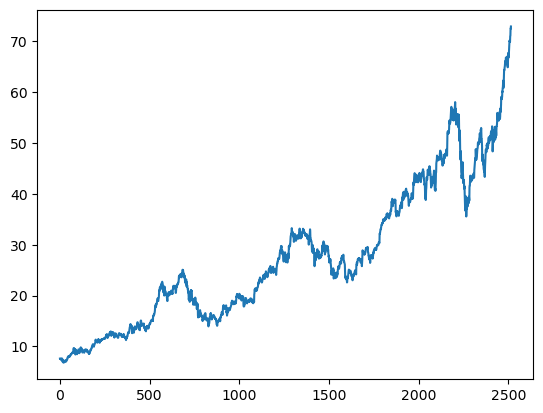

In [23]:
plt.plot(df.Close)

In [24]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [27]:
ma100 = df.Close.rolling(100).mean()

In [28]:
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

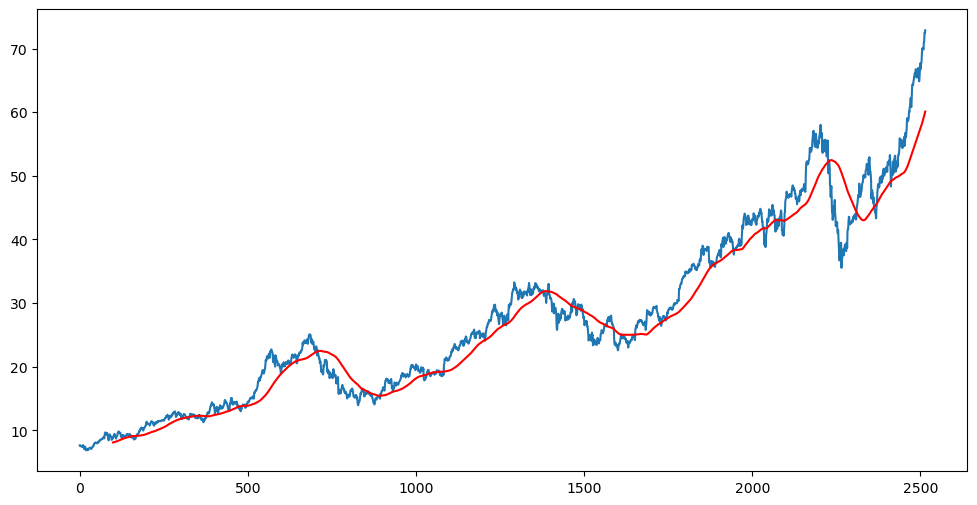

In [29]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [30]:
ma200 = df.Close.rolling(200).mean()

In [31]:
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

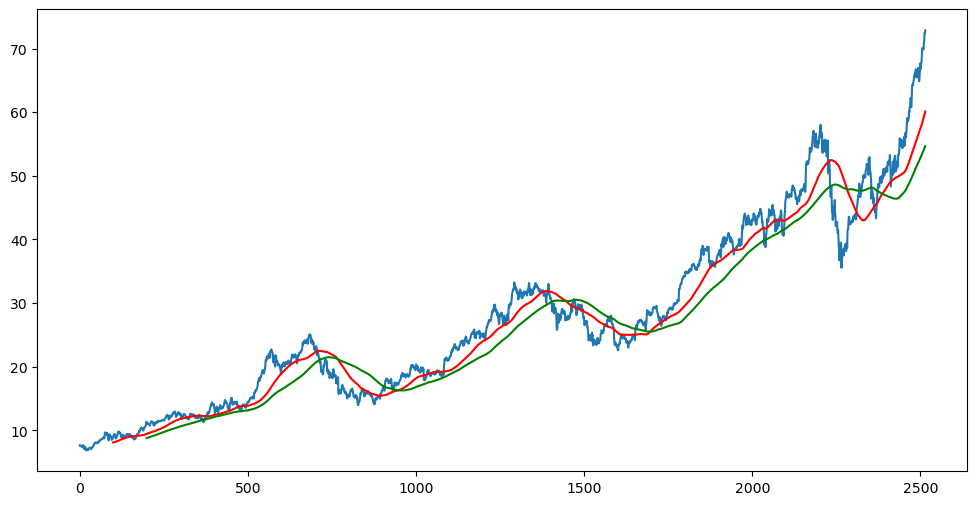

In [32]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [34]:
df.shape

(2515, 5)

In [35]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
data_training_array = scaler.fit_transform(data_training)

In [41]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

In [42]:
x_train

[array([[2.97178191e-02],
        [3.02185410e-02],
        [2.56038878e-02],
        [2.50760817e-02],
        [2.69706691e-02],
        [2.44400837e-02],
        [2.12057268e-02],
        [2.51708129e-02],
        [2.35198380e-02],
        [1.87833875e-02],
        [3.11116846e-02],
        [2.66323796e-02],
        [2.16793646e-02],
        [7.71362572e-03],
        [1.49130326e-02],
        [1.87969205e-02],
        [2.14222733e-02],
        [9.79765742e-03],
        [1.35149573e-05],
        [3.62674239e-03],
        [5.15593812e-03],
        [9.71645927e-03],
        [0.00000000e+00],
        [4.61461711e-03],
        [2.80124591e-03],
        [5.60252796e-03],
        [4.15451231e-03],
        [8.95862792e-03],
        [1.12727391e-02],
        [1.53596224e-02],
        [1.42093514e-02],
        [1.47235702e-02],
        [1.30184452e-02],
        [1.13268532e-02],
        [6.77986503e-03],
        [1.16516638e-02],
        [1.34650350e-02],
        [1.70105973e-02],
        [2.2

In [43]:
y_train

[0.08295551228400305,
 0.08773257990217087,
 0.09307799845000786,
 0.09730023009576089,
 0.0961770070574276,
 0.08648757770355114,
 0.07969414350828452,
 0.07751538062663765,
 0.06921979868242539,
 0.0791122414851117,
 0.08317207682631655,
 0.08421406557612648,
 0.09153526969304987,
 0.10176602006208679,
 0.10801813324219289,
 0.11099529041682749,
 0.1057175550640102,
 0.11069759999473855,
 0.10680016095808181,
 0.10413424529903986,
 0.10102168559811647,
 0.10318693352250902,
 0.0867717531683857,
 0.08049257393752157,
 0.07636509153754628,
 0.07428107790167715,
 0.07656810498635613,
 0.09015490110439062,
 0.08937002176865727,
 0.09144055658352146,
 0.08828741587458566,
 0.08085794755463022,
 0.08211646471050432,
 0.08038430973448946,
 0.07828674500511662,
 0.07244058645013152,
 0.08097972671491666,
 0.08415993347461043,
 0.09062857506078076,
 0.09187357725940049,
 0.09098043372063502,
 0.09747614135756338,
 0.09325390971181036,
 0.0893970878194153,
 0.08823328377306966,
 0.094458330902

In [44]:
x_train = np.array(x_train)
y_train = np.array(y_train)

## ML Model

In [46]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [47]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [49]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50

52/52 [==============================] - 13s 145ms/step - loss: 0.0685
Epoch 2/50
52/52 [==============================] - 7s 141ms/step - loss: 0.0132
Epoch 3/50
52/52 [==============================] - 7s 141ms/step - loss: 0.0111
Epoch 4/50
52/52 [==============================] - 7s 141ms/step - loss: 0.0101
Epoch 5/50
52/52 [==============================] - 7s 142ms/step - loss: 0.0093
Epoch 6/50
52/52 [==============================] - 7s 142ms/step - loss: 0.0083
Epoch 7/50
52/52 [==============================] - 7s 143ms/step - loss: 0.0083
Epoch 8/50
52/52 [==============================] - 7s 144ms/step - loss: 0.0080
Epoch 9/50
52/52 [==============================] - 8s 145ms/step - loss: 0.0081
Epoch 10/50
52/52 [==============================] - 7s 144ms/step - loss: 0.0078
Epoch 11/50
52/52 [==============================] - 8s 147ms/step - loss: 0.0073
Epoch 12/50
52/52 [==============================] - 8s 149ms/step - loss: 0.0077
Epoch 13/50
52/52 [===

In [50]:
model.save('keras_model.h5')

C:\Users\ayanl\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [54]:
past_100_days = data_training.tail(100)

In [69]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [56]:
print(type(past_100_days))
print(type(data_testing))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [57]:
print(past_100_days.shape)
print(data_testing.shape)

(100, 1)
(755, 1)


In [58]:
print(past_100_days.columns)
print(data_testing.columns)

Index(['Close'], dtype='object')
Index(['Close'], dtype='object')


In [70]:
final_df

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000
...,...
850,71.000000
851,71.067497
852,72.477501
853,72.449997


In [71]:
final_df.tail()

,Close
850,71.000000
851,71.067497
852,72.477501
853,72.449997
854,72.879997


In [72]:
input_data = scaler.fit_transform(final_df)

In [73]:
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [74]:
input_data.shape

(855, 1)

In [77]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [78]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [79]:
x_test.shape

(755, 100, 1)

In [80]:
y_test.shape

(755,)

## Making Prediction

In [81]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 53ms/step


In [82]:
y_predicted.shape

(755, 1)

In [83]:
scaler.scale_

array([0.02123255])

In [84]:
scaling_factor = 1/0.02123255

y_predicted = y_predicted * scaling_factor
y_test = y_test * scaling_factor

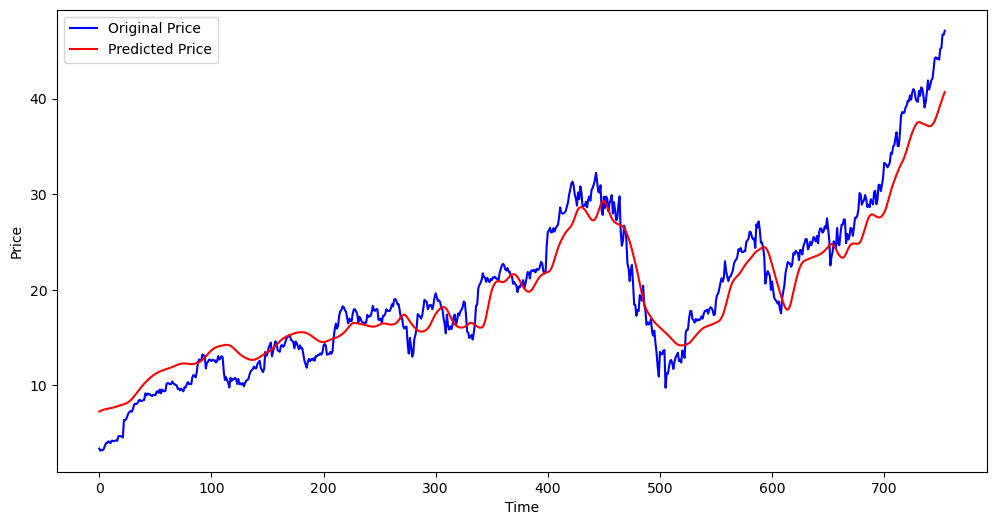

In [86]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()